<a href="https://colab.research.google.com/github/shamim-hussain/4x_superresolution_cnn/blob/master/Wine_Quality_Classification_with_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Classification
We will classifiy wines into either "good" or "bad" categories based on different chemical properties. It makes sense use decision tree for this problem because quality should depend on specific ranges of the chemical properties. The dataset - 

Dataset Link: https://archive.ics.uci.edu/ml/datasets/wine+quality

It is moderate in size, which is ideal for a decision tree classifier.

# Download and Process the Dataset

## Download
We will be using the "white wine" dataset.

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2021-09-16 23:21:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K   434KB/s    in 0.6s    

2021-09-16 23:21:28 (434 KB/s) - ‘winequality-white.csv’ saved [264426/264426]



## Open dataset

In [2]:
import pandas as pd

dataset = pd.read_csv('winequality-white.csv', sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Let's check for missing data.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


No missing data. We also wanna know the min, max, std of the columns

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Splitting the dataset into train and test.

We will do a 80/20 split for train and test

In [5]:
# Shuffle the dataset
dataset = dataset.sample(frac=1, random_state=101).reset_index(drop=True)

trainset_len = int(len(dataset)*.8)
trainset = dataset.iloc[:trainset_len].reset_index(drop=True)
testset = dataset.iloc[trainset_len:].reset_index(drop=True)

## Separate features and target and binarize target
We will predict the quality, but since we wish to explore a binary classification problem. The 50-percentile is 6 so we will assign qualities as such -

**Bad:0** -> When quality between 0-5

**Good:1** -> When quality between 6-9

Also convert everything to float while at it.

In [11]:
train_features = trainset.drop('quality', axis=1).astype(float)
train_targets = (trainset['quality'] > 5).astype(int)

test_features = testset.drop('quality', axis=1).astype(float)
test_targets = (testset['quality'] > 5).astype(int)

X_train = train_features.values
Y_train = train_targets.values

X_test = test_features.values
Y_test = test_targets.values

# Decision Tree Classifier

## Train-Validation Split

Let us first demonstrate our results on a single fold of 9-1 train, validation split. At this stage, we are not trying to regularize the model.

In [107]:
from sklearn.model_selection import train_test_split
Xt, Xv, Yt, Yv = train_test_split(X_train, Y_train, random_state=101, test_size=0.1, stratify=Y_train)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', random_state=102)
model.fit(Xt, Yt)

train_acc = model.score(Xt, Yt)
val_acc = model.score(Xv, Yv)

print(f'Unregularized model raining accuracy = {train_acc:.3%}')
print(f'Unregularized model validation accuracy = {val_acc:.3%}')

Unregularized model raining accuracy = 100.000%
Unregularized model validation accuracy = 79.592%


## Cross-validation

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=109)

# Unregularized
model_unreg = DecisionTreeClassifier(criterion='gini', random_state=109)

cv_unreg = cross_val_score(model_unreg, X_train, Y_train, scoring='accuracy', cv=cv)

print(f'Unregularized model CV results: mean={cv_unreg.mean():0.3%}; std={cv_unreg.std():0.3%}')

Unregularized model CV results: mean=77.651%; std=2.155%


## Regularization

### Max features
The unregularized decision tree is overfitting. Let us try to limit the number of features used for splitting.

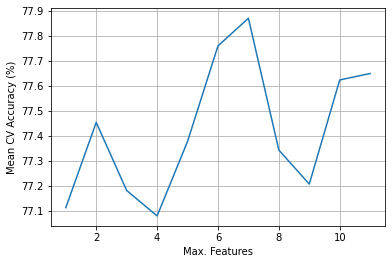

In [85]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=109)

cv_means = []
max_feats = np.arange(1,X_train.shape[-1]+1).astype(int)
for nf in max_feats:
    model_reg = DecisionTreeClassifier(criterion='gini', max_features=nf, random_state=109)
    cv_reg = cross_val_score(model_reg, X_train, Y_train, scoring='accuracy', cv=cv)
    cv_means.append(cv_reg.mean())

cv_means = np.array(cv_means)
plt.plot(max_feats, cv_means*100)
plt.xlabel('Max. Features')
plt.ylabel('Mean CV Accuracy (%)')
plt.grid()

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=109)

model_reg = DecisionTreeClassifier(criterion='gini', max_features=7, random_state=109)

cv_reg = cross_val_score(model_reg, X_train, Y_train, scoring='accuracy', cv=cv)

print(f'Regularized model CV results: mean={cv_reg.mean():0.3%}; std={cv_reg.std():0.3%}')

Regularized model CV results: mean=77.872%; std=2.015%


That seemed to improve the validation accuracy a bit.

### Minimum Impurity
Now, let us try to limit the minimum decrease in impurity to better regulate the splitting of the tree.

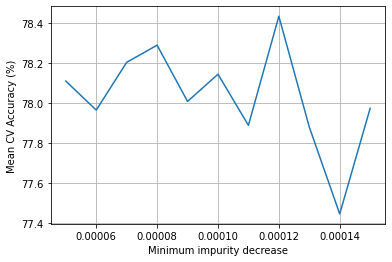

In [89]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=109)

cv_means = []
min_imps = np.linspace(1.5e-4, 5e-5, 11)
for mi in min_imps:
    model_reg = DecisionTreeClassifier(criterion='gini', max_features=7, min_impurity_decrease=mi, random_state=109)
    cv_reg = cross_val_score(model_reg, X_train, Y_train, scoring='accuracy', cv=cv)
    cv_means.append(cv_reg.mean())

cv_means = np.array(cv_means)
plt.plot(min_imps, cv_means*100)
plt.xlabel('Minimum impurity decrease')
plt.ylabel('Mean CV Accuracy (%)')
plt.grid()

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=109)

model_reg = DecisionTreeClassifier(criterion='gini', max_features=7, min_impurity_decrease=0.00012, random_state=109)

cv_reg = cross_val_score(model_reg, X_train, Y_train, scoring='accuracy', cv=cv)

print(f'Regularized model CV results: mean={cv_reg.mean():0.3%}; std={cv_reg.std():0.3%}')

Regularized model CV results: mean=78.433%; std=1.587%


That seemed to further improve the validation result a bit.

## Final testing

In [95]:
model_unreg = DecisionTreeClassifier(criterion='gini', random_state=109)
model_unreg.fit(X_train, Y_train)

test_accuracy_unreg = model_unreg.score(X_test, Y_test)
print(f'Unegularized model test accuracy = {test_accuracy_unreg:0.3%}')

model_reg = DecisionTreeClassifier(criterion='gini', max_features=7, min_impurity_decrease=0.00012, random_state=109)
model_reg.fit(X_train, Y_train)

test_accuracy_reg = model_reg.score(X_test, Y_test)
print(f'Regularized model test accuracy = {test_accuracy_reg:0.3%}')

Unegularized model test accuracy = 77.041%
Regularized model test accuracy = 79.796%


# Bagging and Boosting

## Bagging

The decision trees seem to have high variance, i.e., high capacity. Let us try to use bagging to get better results.

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=109)

model_reg = DecisionTreeClassifier(criterion='gini', max_features=7, min_impurity_decrease=0.00012, random_state=109)

cv_reg = cross_val_score(model_reg, X_train, Y_train, scoring='accuracy', cv=cv)
print(f'CV results for base model: mean={cv_reg.mean():0.3%}; std={cv_reg.std():0.3%}')

for num_models in range(10,51,10):
    model_reg_bagged = BaggingClassifier(model_reg, n_estimators=num_models, random_state=200)

    cv_reg_bagged = cross_val_score(model_reg_bagged, X_train, Y_train, scoring='accuracy', cv=cv)

    print(f'CV results for {num_models} bagged models: mean={cv_reg_bagged.mean():0.3%}; std={cv_reg_bagged.std():0.3%}')

CV results for base model: mean=78.433%; std=1.587%
CV results for 10 bagged models: mean=81.113%; std=1.722%
CV results for 20 bagged models: mean=82.177%; std=1.787%
CV results for 30 bagged models: mean=82.492%; std=1.573%
CV results for 40 bagged models: mean=82.670%; std=1.766%
CV results for 50 bagged models: mean=82.670%; std=2.016%


We see that after bagging 40 decision trees, performance gains become negligible.

### Final testing

In [103]:
model_reg = DecisionTreeClassifier(criterion='gini', max_features=7, min_impurity_decrease=0.00012, random_state=109)
model_reg.fit(X_train, Y_train)

test_accuracy_reg = model_reg.score(X_test, Y_test)
print(f'Base model test accuracy = {test_accuracy_reg:0.3%}')

model_reg_bagged = BaggingClassifier(model_reg, n_estimators=40, random_state=200)
model_reg_bagged.fit(X_train, Y_train)

test_accuracy_reg_bagged = model_reg_bagged.score(X_test, Y_test)
print(f'Bagged model test accuracy = {test_accuracy_reg_bagged:0.3%}')

Base model test accuracy = 79.796%
Bagged model test accuracy = 83.061%
